In [32]:
import numpy as np
import torch

!pip install train
!pip install barbar

from train import TrainerDeepSVDD
from preprocess import get_mnist

!pip install future
!pip install goslate


In [35]:
class argum:
    batch_size=200
    pretrain=True
    num_epochs=150
    num_epochs_ae=150
    latent_dim=32
    patience=50
    lr=1e-4
    weight_decay=0.5e-6
    weight_decay_ae=0.5e-3
    lr_ae=1e-4
    lr_milestones=[50]
    normal_class=1
    
    
A=argum()
dvc=torch.device('cuda' if torch.cuda.is_available() else 'cpu')
dt=get_mnist(A)
dpSVDD=TrainerDeepSVDD(A, dt, dvc)

if A.pretrain:
    dpSVDD.pretrain()

dpSVDD.train()

6742/6742: [===============================>] - ETA 0.3s
Pretraining Autoencoder... Epoch: 0, Loss: 170.579
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 1, Loss: 127.885
6742/6742: [===============================>] - ETA 0.3s
Pretraining Autoencoder... Epoch: 2, Loss: 93.969
6742/6742: [===============================>] - ETA 0.3s
Pretraining Autoencoder... Epoch: 3, Loss: 68.828
6742/6742: [===============================>] - ETA 0.3s
Pretraining Autoencoder... Epoch: 4, Loss: 51.361
6742/6742: [===============================>] - ETA 0.2s
Pretraining Autoencoder... Epoch: 5, Loss: 39.498
6742/6742: [===============================>] - ETA 0.3s
Pretraining Autoencoder... Epoch: 6, Loss: 31.360
6742/6742: [===============================>] - ETA 0.3s
Pretraining Autoencoder... Epoch: 7, Loss: 25.653
6742/6742: [===============================>] - ETA 0.3s
Pretraining Autoencoder... Epoch: 8, Loss: 21.500
6742/6742: [=======================

In [36]:
from test import eval
lb,sc=eval(dpSVDD.net,dpSVDD.c,dt[1],dvc)

Testing...
ROC AUC score: 99.54


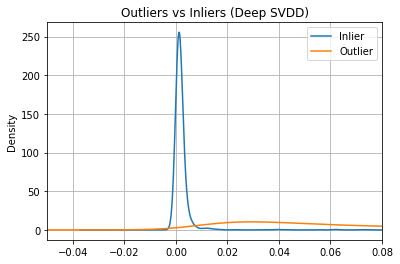

In [37]:
import pandas as pd 
import matplotlib.pyplot as plt


scIn=sc[np.where(lb==0)[0]]
scOut=sc[np.where(lb==1)[0]]

inn=pd.DataFrame(scIn,columns=['Inlier'])
outt=pd.DataFrame(scOut,columns=['Outlier'])


fig,ax=plt.subplots()
inn.plot.kde(ax=ax,legend=True,title='Outliers vs Inliers (Deep SVDD)')
outt.plot.kde(ax=ax, legend=True)
plt.xlim(-0.05, 0.08)
ax.grid(axis='x')
ax.grid(axis='y')
plt.show()